## Signal Processing
The plots created in the last section show a strong annual harmonic component. Lets, identify this components, subtract them from the signal and the re-plot to see if there is any transannual trend.

> What if the annual change is not harmonic but another function? for example is could be piecewise (for rain/snow) or polynomial/logarithmical?. Use BLUE to get proper fit. (next section)



In [3]:
import pandas as pd
import numpy as np
from funciones import*
import matplotlib.pyplot as plt

Data=pd.read_csv("../../data/Time_series_DATA.txt",skiprows=149,index_col=0)
Data=Data.drop(columns=['Predicted ice thickness [m]','Noisy predicted ice thickness [m]','Days since start of year','Days until break up','Noisy predicted ice thickness [m]','Global: Pacific decadal oscillation index','Global: Artic oscillation index','Global: ENSO-Southern oscillation index','Gulkana: Glacier-wide winter mass balance [m.w.e]','Gulkana: Glacier-wide summer mass balance [m.w.e]'])
#Data=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/Time_series_DATA.txt',index_col=0,skiprows=149)
Data.index = Data.index.astype(str).str.split().str[0]
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")






> We could *introduce*  a **lot more** of signal processing concepts such as:  welch periodogram, filters, windows, spectrogram,etc  and make a bunch of plot comparing them.

:::{card} Exercise 1
Compute the Power Spectrum Density of each of the column, do all the variable experience the seem seasonal behaviour?


- We can see peaks at 
    - 120 days
    - 180 days 
    - 360 days

:::


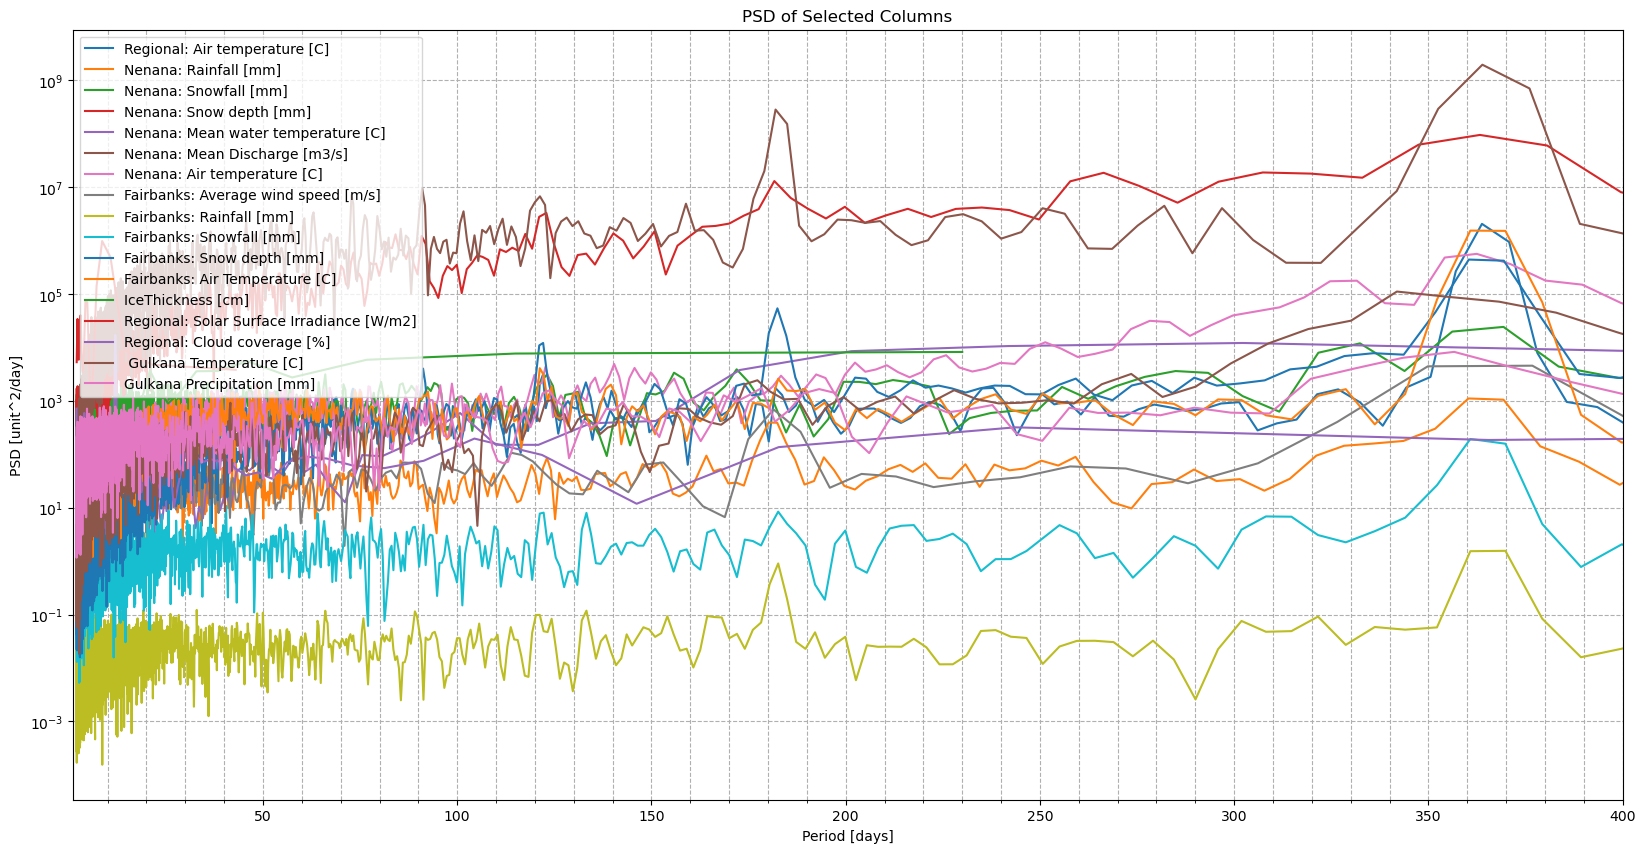

In [2]:
compute_and_plot_psd(Data,plot_period=True)

> put here plot of historic seasonality+ harmonic identified


> create function for variables that are clearly piecewise `asymmetric`like ice/rain that, only happen in the winter, either use the `filter_df` function created previously or manage this (edge)case in a specific function

## is the seasonality really harmonic??
 >Fit a model(BLUE) but considering 1 harmonic, how does it differs from the PSD? Now using 4 harmonics, one for each season.

> What about the DC component ( how does this relate to linear trend)?


## If not harmonic then what?
if the seasonality is not harmonic ( mention that every finite (number) piecewise differentiable function can be expressed as sums of harmonics, but that not what we mean in this context) we have to propose a model, fit it using BLUE, and compute GOF

```
do that for:
    - quadratic
    - piecewise logistic
    - piecewise expo(norm)

```


